## 주성분 분석

In [128]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris(as_frame=True)

In [150]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [129]:
df=iris['data']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [130]:
species=iris['target']
species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## Normalize Data

In [131]:
df_norm = (df-df.mean())/df.std()

In [132]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
Z=pca.fit_transform(df_norm)

In [133]:
pca.explained_variance_

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [134]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [135]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

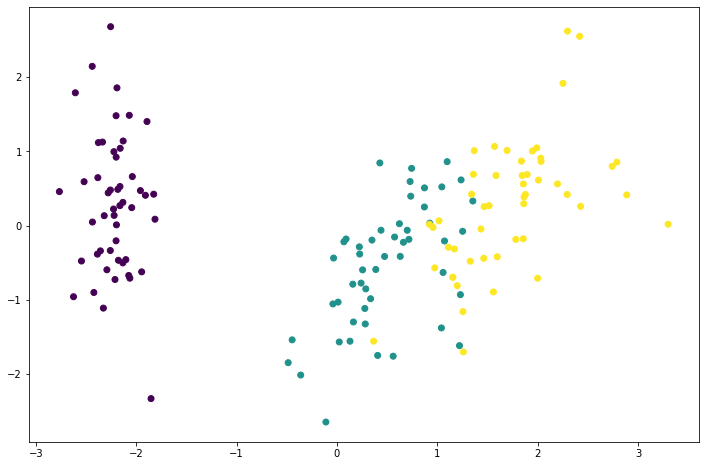

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(Z[:,0],Z[:,1],c=species)

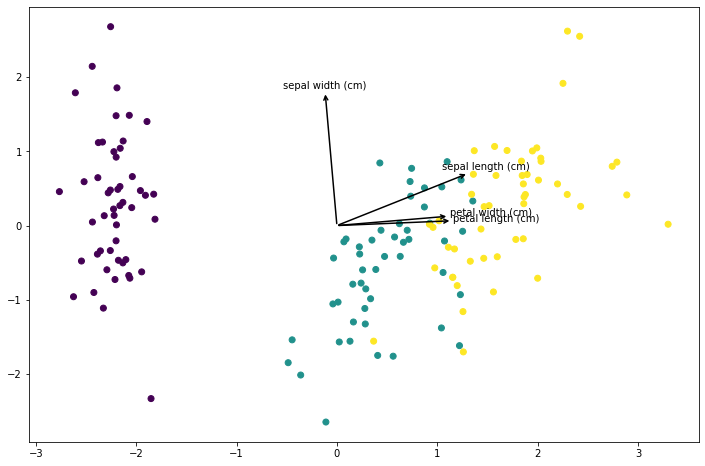

In [157]:
factor=pca.components_[:2,:].T
plt.figure(figsize=(12,8))
plt.scatter(Z[:,0],Z[:,1],c=species)
for i in range(4):
    plt.annotate(df.columns[i],xy=(0,0),xytext=(factor[i]*2),arrowprops={'lw':1.5, 'arrowstyle':'<-'})

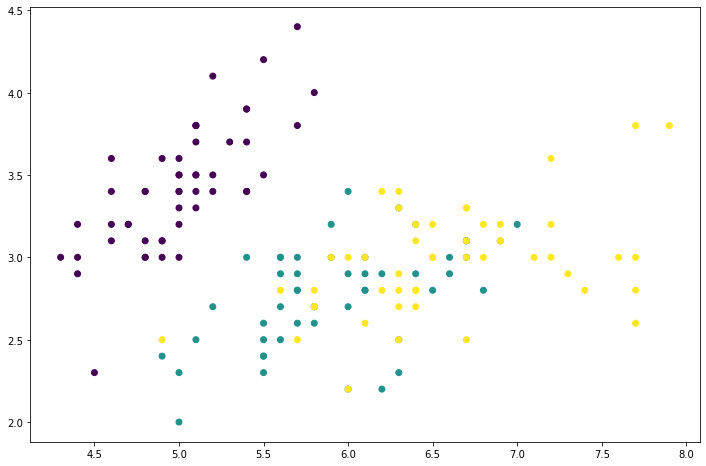

In [70]:
plt.figure(figsize=(12,8))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=species)

## Visualizing MNIST

In [90]:
digit=datasets.load_digits(n_class=10, as_frame=False)

In [92]:
data=digit['data']

In [103]:
target=digit['target']

## 데이터 확인

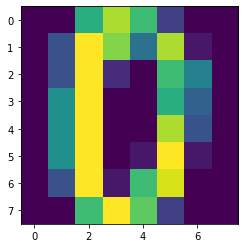

In [97]:
plt.imshow(data[30].reshape(8,8))

In [99]:
data_norm = (data-data.min())/(data.max()-data.min())
data_norm

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [100]:
pca = PCA(n_components=5)
Z = pca.fit_transform(data_norm)

In [101]:
pca.explained_variance_

array([0.69924582, 0.63952245, 0.55386109, 0.39492334, 0.2715358 ])

In [102]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353])

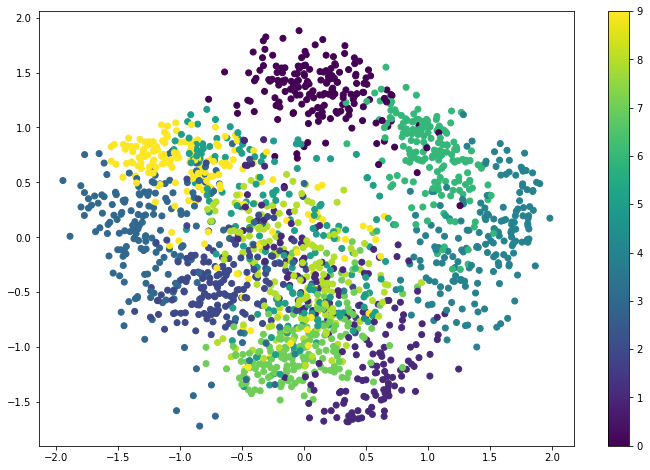

In [127]:
plt.figure(figsize=(12,8))
plt.scatter(Z[:,0],Z[:,1],c=target, label=target)
plt.colorbar(ticks=range(10))